# MIHIR THAKKAR

# TASK 1 - THE SPARKS FOUNDATION

# IRIS DATASET - K MEAN CLUSTERING

###### Introduction to the dataset

The dataset consists of 3 species of Iris Flowers and gives information on 4 features of these three species.
 Namely the Species are :
1. Setosa
2. Versicolor
3. Virginica

The 4 features measured in centimeters are: 
1. SepalLength 
2. SepalWidth 
3. PetalLength
4. PetalWidth

So based on the given information we have the **task** to apply K Mean algorithm and divide the flowers rightly into different clusters based on the features.

K-Mean is an Unsupervised ML algorithm, so we assume that the target column in unknown while performing the clustering algorithm

## PROBLEM STATEMENT

### For  ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

##### Importing Basic Libraries and Visualization Libraries

In [202]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing ML libraries

In [203]:
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder

from sklearn import metrics
from sklearn.cluster import KMeans


##### Load Dataset

In [215]:
df = pd.read_csv("C:/Users/miihi/Data/Sparks Foundation/Iris.csv")

In [216]:
# DROP THE ID VARIABLE AS IT WON'T BE USED IN ANY WAY

df = df.drop('Id', 1)
df.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

##### Analysing Data

In [217]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [218]:
print(f"The data has {df.shape[0]} rows and {df.shape[1]} columns")

The data has 150 rows and 5 columns


In [219]:
df.Species.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [220]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [222]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [223]:
# CONVERTING THE COLUMN NAMES INTO LOWERCASE

df = df.rename(columns= lambda x : x.lower())
df.columns

Index(['sepallengthcm', 'sepalwidthcm', 'petallengthcm', 'petalwidthcm',
       'species'],
      dtype='object')

### Distribution of the features using Histogram

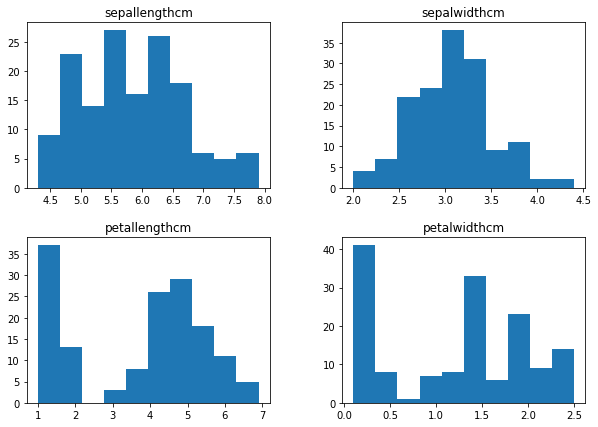

In [224]:
df.hist(figsize=(10,7), grid = False )
plt.show()

##### PAIRPLOTS

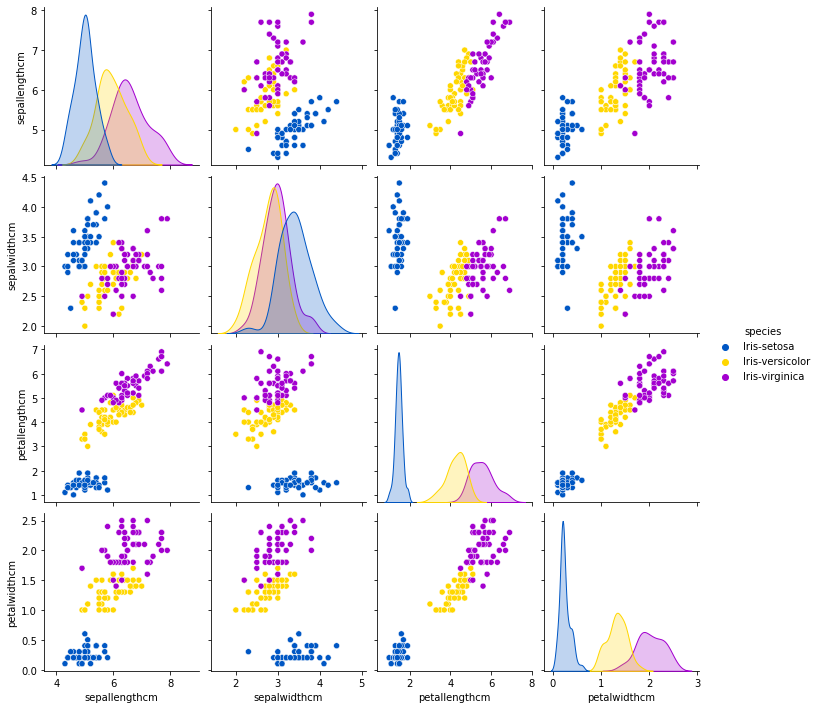

In [227]:
sns.pairplot(data = df, palette="prism",hue='species' )
plt.show()

##### VIOLIN PLOTS
###### 1. Sepal Length

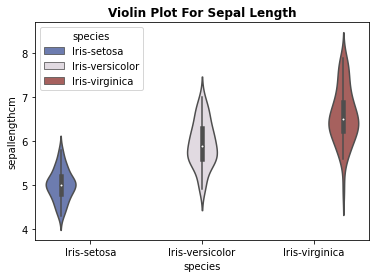

In [232]:
#  'sepalwidthcm', 'petallengthcm', 'petalwidthcm
sns.violinplot(x = df.species, y = df.sepallengthcm, hue = df.species, palette="twilight_shifted")
plt.title("Violin Plot For Sepal Length", fontweight = "bold")
plt.show()

###### 2. Sepal Width

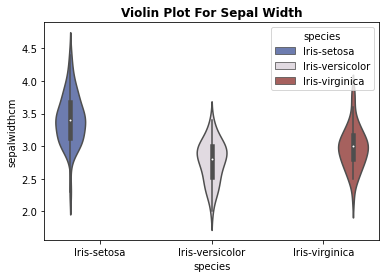

In [233]:
#  'petallengthcm', 'petalwidthcm
sns.violinplot(x = df.species, y = df.sepalwidthcm, hue = df.species, palette="twilight_shifted")
plt.title("Violin Plot For Sepal Width", fontweight = "bold")
plt.show()

###### 3. Petal Length

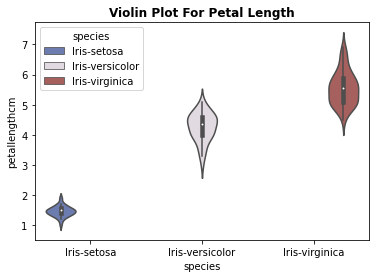

In [234]:
sns.violinplot(x = df.species, y = df.petallengthcm, hue = df.species, palette="twilight_shifted")
plt.title("Violin Plot For Petal Length", fontweight = "bold")
plt.show()

###### 4. Petal Width

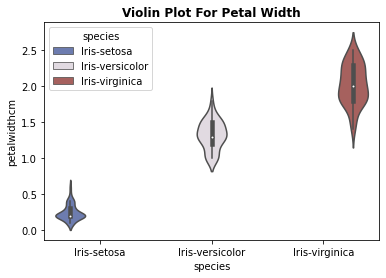

In [235]:
sns.violinplot(x = df.species, y = df.petalwidthcm, hue = df.species, palette="twilight_shifted")
plt.title("Violin Plot For Petal Width", fontweight = "bold")
plt.show()

##### PIE CHART FOR SPECIES COLUMN

<AxesSubplot:ylabel='species'>

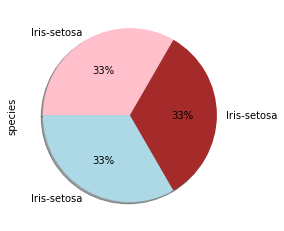

In [236]:
df.species.value_counts().plot.pie(colors = ['lightblue', 'brown', 'pink'], labels = df.species,
                              startangle = 180, shadow = True, autopct = '%.0f%%')

###### SEPERATING THE FEATURES AND THE TARGET  

In [237]:
inputdata = df.iloc[:, :-1]
outputdata = df.species.to_frame()

In [238]:
inputdata.head()

,sepallengthcm,sepalwidthcm,petallengthcm,petalwidthcm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [239]:
outputdata.head()

,species
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


###### To find the right number of clusters


In [240]:
n_clus = list(range(1, 10))
inertia_list = []

for i in n_clus:
    model_i = KMeans(n_clusters= i, init='k-means++', max_iter=300)
    model_i.fit(inputdata)
    inertia_list.append(model_i.inertia_)
    
clust_df = pd.DataFrame(n_clus, columns=['Number of Clusters'])
inert_list_df = pd.DataFrame(inertia_list, columns=['Inertia'])

inertia_df = pd.concat([clust_df, inert_list_df], axis = 1)
inertia_df.head(10)



C:\Users\miihi\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,Number of Clusters,Inertia
0,1,680.824400
1,2,152.368706
2,3,78.940841
3,4,57.345409
4,5,46.535582
5,6,38.957011
6,7,34.190688
7,8,29.961863
8,9,28.861949


##### ELBOW METHOD

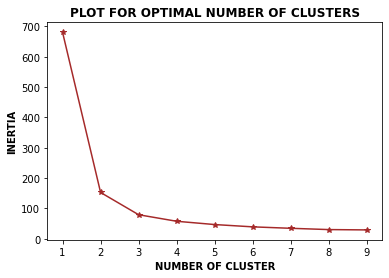

In [242]:
plt.plot(n_clus, inertia_list, c = "brown", marker= "*", )
plt.xlabel("NUMBER OF CLUSTER",fontweight = "bold" )
plt.ylabel("INERTIA",fontweight = "bold")
plt.title("PLOT FOR OPTIMAL NUMBER OF CLUSTERS", fontweight = "bold")

plt.show()

##### K MEAN MODEL - 3 CLUSTERS

In [243]:
k_means_model = KMeans(n_clusters=3)

k_means_model.fit(inputdata)

pred_means =k_means_model.fit_predict(inputdata)

In [244]:
df['Cluster'] = pred_means


###### FINDING CENTROID FOR EACH CLUSTER
Before visualizing the clusters, we first have to find the centroid for each cluster

In [245]:
c = np.array(k_means_model.cluster_centers_)
centroids = pd.DataFrame(c)
centroids


,0,1,2,3
0,5.901613,2.748387,4.393548,1.433871
1,5.006000,3.418000,1.464000,0.244000
2,6.850000,3.073684,5.742105,2.071053


##### VISUALIZING CENTROIDS

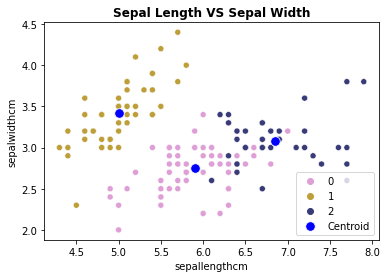

In [246]:
sns.scatterplot(x= inputdata.sepallengthcm, y = inputdata.sepalwidthcm, hue = df.Cluster,
               marker = "o", palette="tab20b_r")
sns.scatterplot(x = c[:,0], y = c[:,1], marker= "o", color = "b", s = 90 ,label = "Centroid")
plt.title("Sepal Length VS Sepal Width", fontweight = "bold")
plt.show()

# THANK YOU - THE SPARKS FOUNDATION